In [16]:
from python_speech_features import mfcc
from scipy.io import wavfile
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [3]:
frequency, wave = wavfile.read("agua.wav")
transcription = "agua"

In [4]:
mfccs = mfcc(wave)
mfccs.shape

(165, 13)

In [10]:
num_clusters = len(set(transcription)) + 1
num_clusters

4

In [11]:
kmeans = KMeans(n_clusters=num_clusters)
resuls = kmeans.fit(mfccs)
resuls.cluster_centers_

array([[-2.81390686e+01, -4.52141359e+00, -1.89547447e+00,
        -1.89091633e-02, -9.43077335e-01, -8.34804776e-02,
         1.46557634e+00, -4.19029307e-01,  4.84225580e-01,
        -8.26154664e-01, -8.57977761e-01,  1.11091497e+00,
        -1.37310817e+00],
       [ 2.04890804e+01,  1.23639597e+01, -4.39597574e+01,
        -5.33524723e+00, -2.66568341e+01,  1.39266502e+00,
         3.64851970e+01, -2.17684277e+01, -1.09451091e+01,
         3.33033017e+00, -1.89574680e+01, -4.12043433e+00,
        -9.45009608e+00],
       [ 1.78518910e+01,  2.61193066e+01, -1.43418073e+01,
         8.79645474e+00, -2.46207085e+01, -2.67985251e+01,
        -1.03715220e+00, -3.02706791e+01, -5.61417821e+00,
         7.45900349e+00, -1.21891625e+01,  2.33364443e+00,
        -5.36705574e+00],
       [ 1.44319191e+01,  1.30039535e+01, -4.20196919e+01,
         1.05114570e+01, -1.54602750e+01, -1.34656300e+01,
         1.51486602e+01, -2.11376057e+01, -1.06121237e+00,
         2.86142813e+00, -1.32726307e

In [12]:
resuls.cluster_centers_.shape

(4, 13)

In [13]:
resuls.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [14]:
resuls.labels_.shape

(165,)

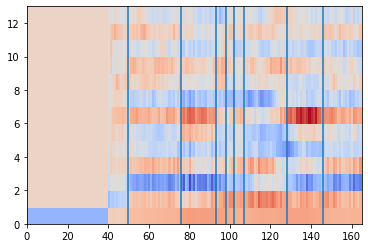

In [20]:
plt.pcolormesh(mfccs.T, cmap=get_cmap("coolwarm"))
current_label = 0
for index, label in enumerate(resuls.labels_):
    if label!= current_label:
        current_label = label
        plt.axvline(index)